# Exercise 7: Clustering the fish data

Now use your standardization and clustering pipeline from the previous exercise to cluster the fish by their measurements, and then create a cross-tabulation to compare the cluster labels with the fish species.

**Step 1:** Load the dataset, extracting the species of the fish as a list `species` _(done for you)_

In [5]:
import pandas as pd

df = pd.read_csv('../datasets/fish.csv')

# remove the species from the DataFrame so only the measurements are left
species = list(df['species'])
del df['species']

**Step 2:** Build the pipeline as in the previous exercise _(filled in for you)._

In [3]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
kmeans = KMeans(n_clusters = 4)
pipeline = make_pipeline(scaler, kmeans)

**Step 3:** Fit the pipeline to the fish measurements `samples`.

In [9]:
samples = df.values
pipeline.fit(samples)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=4))])

**Step 4:** Obtain the cluster labels for `samples` by using the `.predict()` method of `pipeline`, assigning the result to `labels`.

In [10]:
labels = pipeline.predict(samples)

**Step 5:** Using `pd.DataFrame()`, create a DataFrame `df` with two columns named `'labels'` and `'species'`, using `labels` and `species`, respectively, for the column values.

In [12]:
df = pd.DataFrame()
df["labels"] = labels
df["species"] = species

**Step 6:** Using `pd.crosstab()`, create a cross-tabulation `ct` of `df['labels']` and `df['species']`.

In [13]:
ct = pd.crosstab(df["labels"],df["species"])

**Step 7:** Display your cross-tabulation, and check out how good your clustering is!

In [22]:
ct
# It's done pretty well I think, majority of values are in their own row and column

species,Bream,Pike,Roach,Smelt
labels,,,,
0,33,0,1,0
1,0,0,0,13
2,1,0,19,1
3,0,17,0,0


Text(0.5, 1.0, 'Wow! Clusters!')

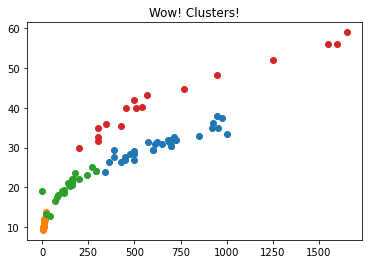

In [23]:
import matplotlib.pyplot as plt
import numpy as np

def separate_labels(labels, points):
    data_0 = []
    data_1 = []
    data_2 = []
    data_3 = []
    for i in range(len(labels)):
        if labels[i] == 0:
            data_0.append(points[i])
        if labels[i] == 1:
            data_1.append(points[i])
        if labels[i] == 2:
            data_2.append(points[i])
        if labels[i] == 3:
            data_3.append(points[i])
            
    data_0 = np.array(data_0)
    data_1 = np.array(data_1)
    data_2 = np.array(data_2)
    data_3 = np.array(data_3)
    
    return data_0,data_1,data_2,data_3

data_0,data_1,data_2,data_3 = separate_labels(labels, samples)

plt.scatter(data_0[:,0], data_0[:,1])
plt.scatter(data_1[:,0], data_1[:,1])
plt.scatter(data_2[:,0], data_2[:,1])
plt.scatter(data_3[:,0], data_3[:,1])
plt.title("Wow! Clusters!")